<a href="https://colab.research.google.com/github/EdenGebremedhin/BookStoreApp/blob/main/Frontier%20Tech%20Leaders_ML_assignmentEden_Gebremedhin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Assignment 1: Feature Importance & Multicollinearity

Using the cleaned data under df, you are expected to:

1. Implement a feature importance method different from the ones already experimented with in this case.

Feature Importance:
   Feature  Importance
0      X1    0.753351
2      X3    0.124779
1      X2    0.108847
3      X4    0.008831
4      X5    0.004192


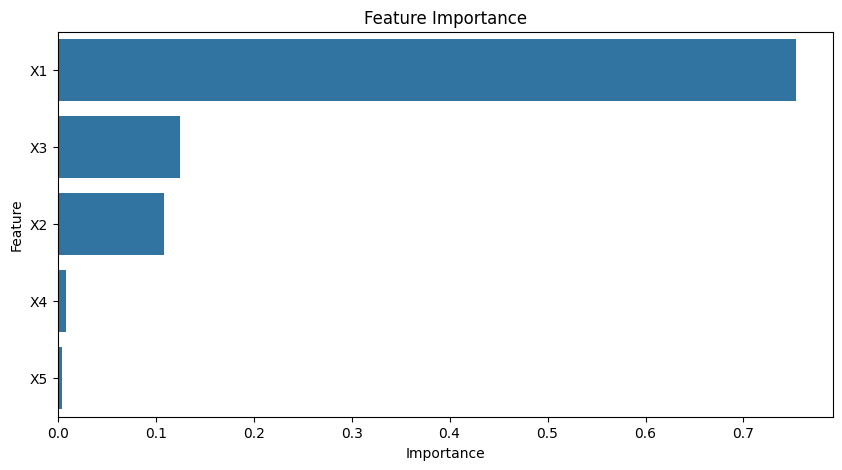

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
size = 1000  # Number of samples
X1 = np.random.normal(50, 10, size)   # Normal Distribution
X2 = X1 * 0.8 + np.random.normal(0, 2, size)  # Correlated with X1
X3 = np.random.uniform(30, 70, size)  # Uniform Distribution
X4 = np.random.exponential(5, size)   # Exponential Distribution
X5 = np.random.poisson(3, size)       # Poisson Distribution

# Target variable (depends on some features)
target = 3 * X1 + 2 * X2 - 1.5 * X3 + np.random.normal(0, 10, size)

# Create DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4, 'X5': X5, 'target': target})

# Split into train and test sets
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Importance using Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Print Feature Importance
print("Feature Importance:\n", feature_importance)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'])
plt.title("Feature Importance")
plt.show()



2. Check for multicollinearity and covariance in the dataset.

Variance Inflation Factor (VIF):
   Feature         VIF
0      X1  429.589338
1      X2  425.599587
2      X3   12.984850
3      X4    1.949449
4      X5    4.141011


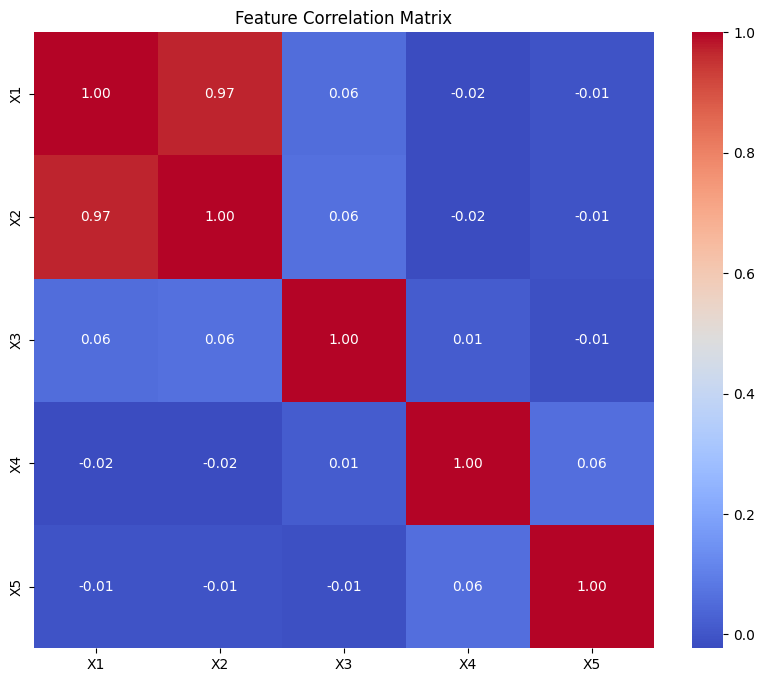

In [ ]:
# Multicollinearity Check using VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF):\n", vif_data)

# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

Assignment 2: Data Distributions & Visualization

1. Work with at least five different types of data distributions.

2. Visualize them using synthetic data.

1. Uniform Distribution

A uniform distribution has all outcomes equally likely.

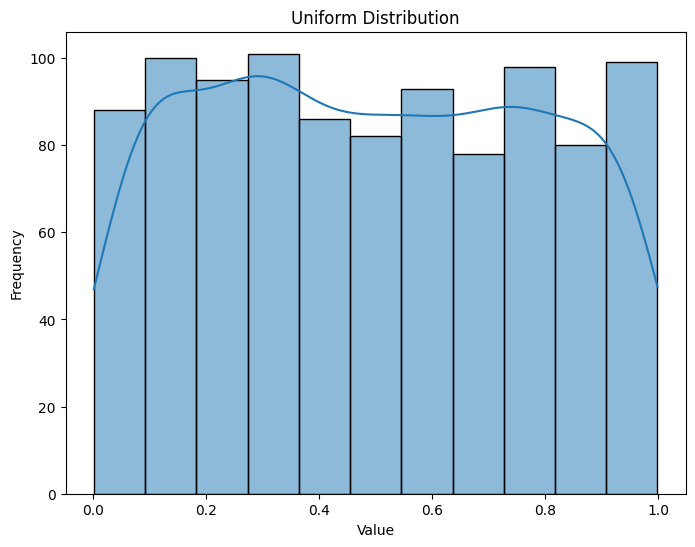

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate uniform data
uniform_data = np.random.uniform(0, 1, 1000)

# Visualize
plt.figure(figsize=(8, 6))
sns.histplot(uniform_data, kde=True)
plt.title("Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

- Every outcome within the specified range is equally likely.
- Visualized as a flat rectangle.

2. Normal (Gaussian) Distribution

The normal distribution is bell-shaped and symmetrical.

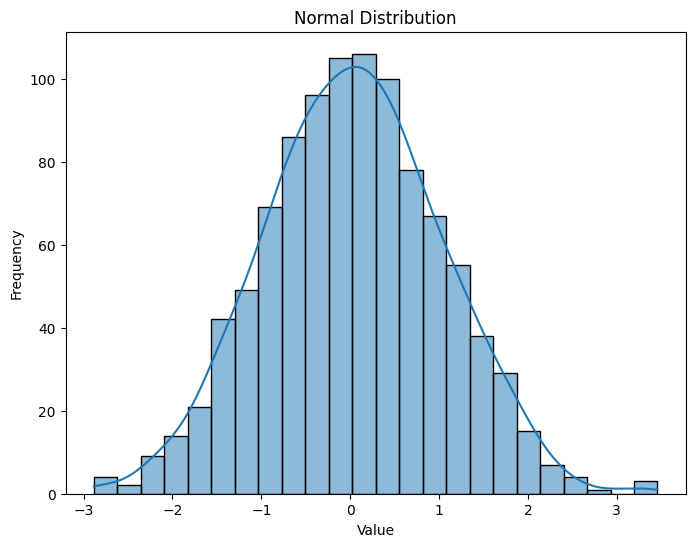

In [ ]:
# Generate normal data
normal_data = np.random.normal(0, 1, 1000)  # Mean 0, standard deviation 1

# Visualize
plt.figure(figsize=(8, 6))
sns.histplot(normal_data, kde=True)
plt.title("Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

- Symmetrical bell-shaped curve.
- Characterized by mean and standard deviation.
- Many natural phenomena follow this distribution.


3. Exponential Distribution

The exponential distribution models the time between events in a Poisson process.

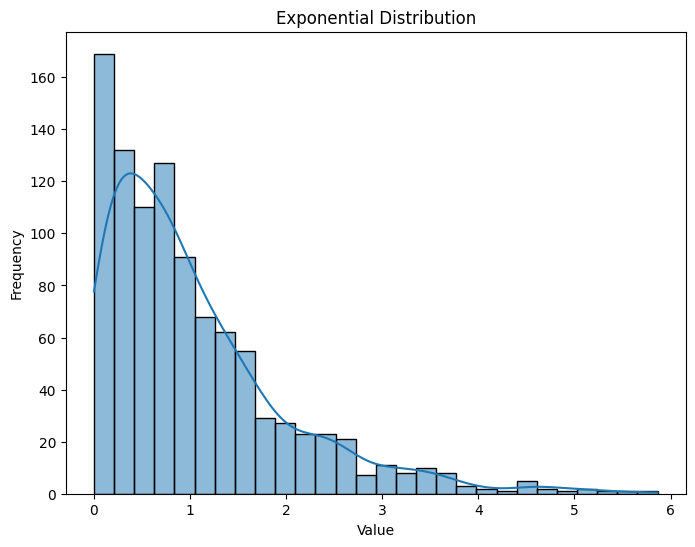

In [ ]:
# Generate exponential data
exponential_data = np.random.exponential(1, 1000)  # Lambda = 1

# Visualize
plt.figure(figsize=(8, 6))
sns.histplot(exponential_data, kde=True)
plt.title("Exponential Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

- Describes the time between events in a Poisson process.
- Right-skewed, with a long tail.
- Often used in reliability analysis.

4. Binomial Distribution

The binomial distribution models the number of successes in a fixed number of independent trials.



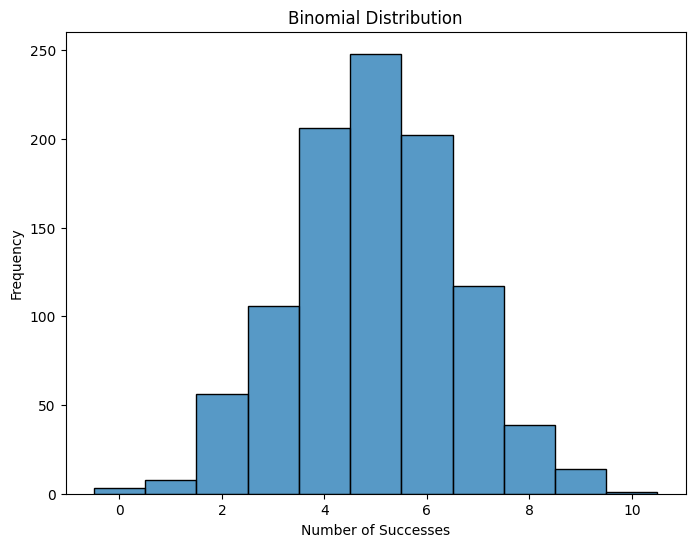

In [ ]:
# Generate binomial data
binomial_data = np.random.binomial(10, 0.5, 1000)  # 10 trials, probability 0.5

# Visualize
plt.figure(figsize=(8, 6))
sns.histplot(binomial_data, kde=False, discrete=True)
plt.title("Binomial Distribution")
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.show()

- Models the number of successes in a fixed number of trials.
- Discrete distribution.
- Depends on the number of trials and the probability of success.

5. Poisson Distribution

The Poisson distribution models the number of events occurring in a fixed interval of time or space.

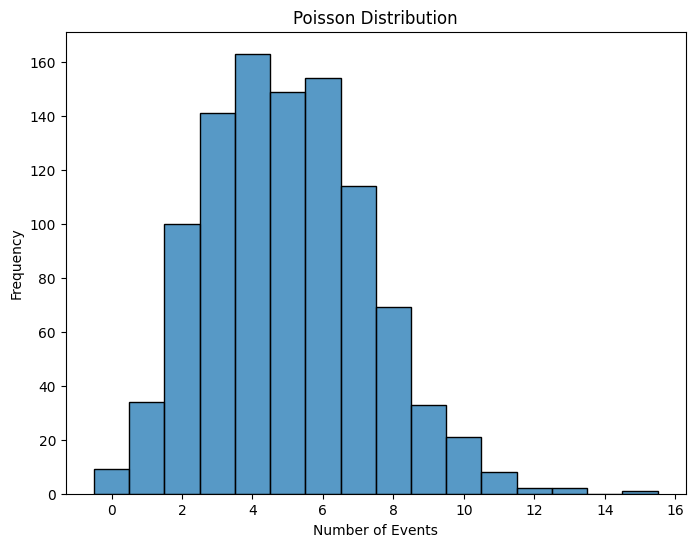

In [ ]:
# Generate Poisson data
poisson_data = np.random.poisson(5, 1000)  # Lambda = 5

# Visualize
plt.figure(figsize=(8, 6))
sns.histplot(poisson_data, kde=False, discrete=True)
plt.title("Poisson Distribution")
plt.xlabel("Number of Events")
plt.ylabel("Frequency")
plt.show()

- Models the number of events in a fixed interval.
- Discrete distribution.
- Depends on the average rate of events (lambda).